In [1]:
import pandas as pd

url = "drive/MyDrive/Dados/data_amazon.xlsx - Sheet1.csv"
dados= pd.read_table(url, delimiter=",")
dados['Review'] = dados['Review'].fillna('')
dados.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [2]:
dados.shape

(49338, 9)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False, max_features=50)
palavras = vetorizar.fit_transform(dados["Review"])
palavras.shape

(49338, 50)

In [4]:
matriz = pd.DataFrame.sparse.from_spmatrix(palavras, columns=vetorizar.get_feature_names_out())
matriz

,The,This,am,and,are,as,at,be,but,color,...,to,too,top,up,very,was,wear,with,would,you
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,2,0
2,0,0,0,3,0,0,0,1,2,0,...,2,0,1,1,1,3,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,3,0,0,0,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49333,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49334,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49335,0,0,0,1,0,0,0,0,1,0,...,2,0,0,1,1,0,0,0,0,0
49336,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False, max_features=50)
palavras = vetorizar.fit_transform(dados["Review"])
palavras.shape
matriz = pd.DataFrame.sparse.from_spmatrix(palavras, columns=vetorizar.get_feature_names_out())

modelo = LogisticRegression()

dados['Cons_rating'] = pd.to_numeric(dados['Cons_rating'], errors='coerce')
dados['Cons_rating'] = dados['Cons_rating'].fillna(-1)

x_treino, x_teste, y_treino, y_teste = train_test_split(matriz, dados["Cons_rating"], test_size=0.25, random_state=43)

modelo.fit(x_treino, y_treino)
pred = modelo.predict(x_teste)
print(f"{(accuracy_score(y_teste, pred)*100):.2f}%")

58.41%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


vetorizar = TfidfVectorizer(lowercase=False, max_features=50)
palavras = vetorizar.fit_transform(dados["Review"])
matriz = pd.DataFrame.sparse.from_spmatrix(palavras, columns=vetorizar.get_feature_names_out())

modelo = LogisticRegression()

dados['Cons_rating'] = pd.to_numeric(dados['Cons_rating'], errors='coerce')
dados['Cons_rating'] = dados['Cons_rating'].fillna(-1)

x_treino, x_teste, y_treino, y_teste = train_test_split(matriz, dados["Cons_rating"], test_size=0.25, random_state=43)

modelo.fit(x_treino, y_treino)
pred = modelo.predict(x_teste)
print(f"{(accuracy_score(y_teste, pred)*100):.2f}%")

58.61%


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dados['Cons_rating'] = pd.to_numeric(dados['Cons_rating'], errors='coerce')
dados['Cons_rating'] = dados['Cons_rating'].fillna(-1)

x_treino, x_teste, y_treino, y_teste = train_test_split(matriz, dados["Cons_rating"], test_size=0.25, random_state=43)
modelo = MultinomialNB()
modelo.fit(x_treino, y_treino)

y_pred = modelo.predict(x_teste)

print(f"{(accuracy_score(y_teste, pred)*100):.2f}%")


58.61%


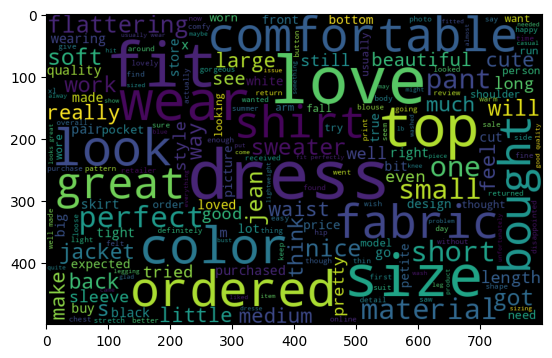

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_palavras = ' '.join([texto for texto in dados['Review']])
palavras_nuvem = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

plt.figure()
plt.imshow(palavras_nuvem)
plt.show()

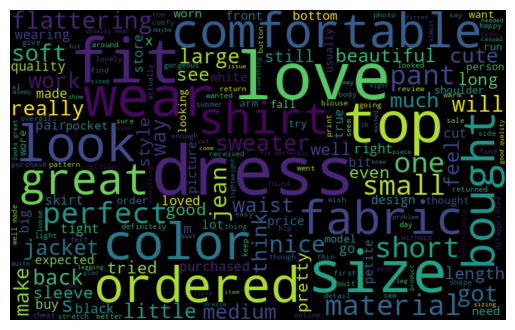

In [ ]:
plt.figure()
plt.imshow(palavras_nuvem, interpolation="bilinear")
plt.axis('off')
plt.show()

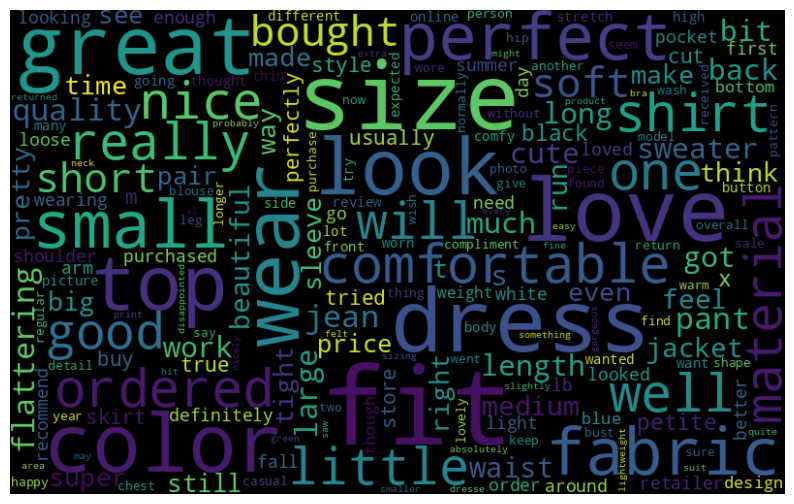

In [ ]:
palavras_nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(palavras_nuvem, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def palavras_nuvens(dados, coluna_texto, nota):

  texto_sentimento = dados.query(f"Cons_rating == {nota}")[coluna_texto]


  texto_unido = ' '.join(texto_sentimento)


  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()


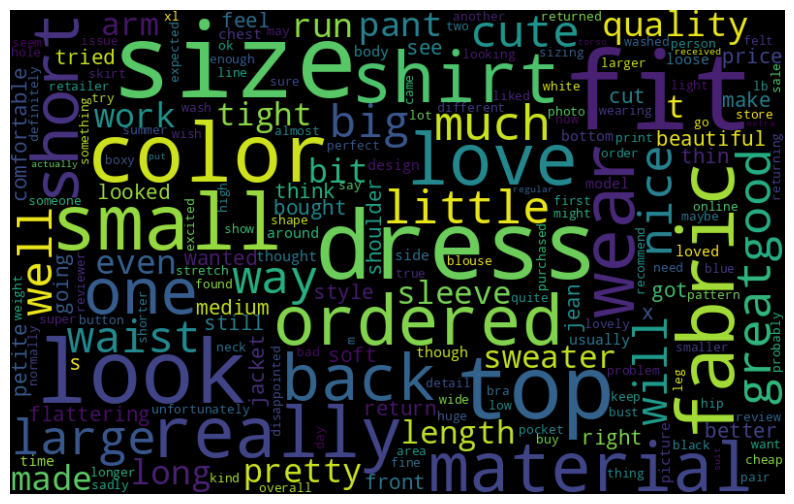

In [ ]:
# Essa função acima é pego os dados que queremos analisar, pega a coluna onde possue as avaliações, e tem o outro parâmetro que é a nota da avaliação.
# Então é possível buscar o que o pessoal mais está comentando com base na nota que botei para ser analisado, no caso peguei a nota 3 como teste.

palavras_nuvens(dados, 'Review', 3)

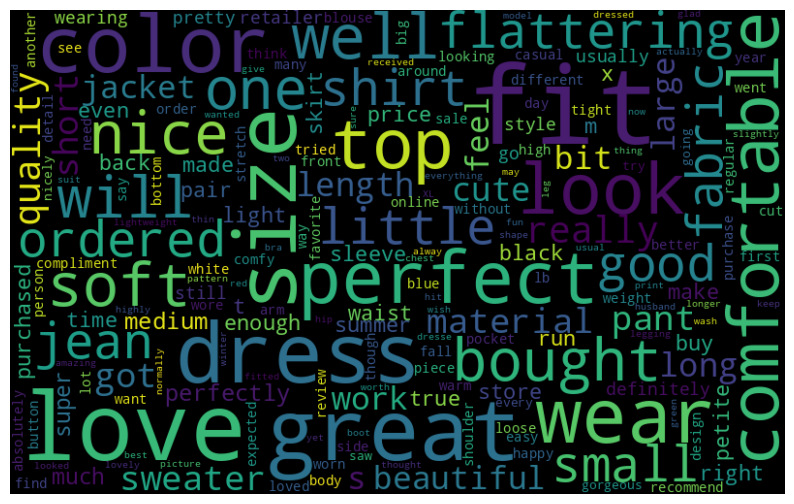

In [ ]:
palavras_nuvens(dados, 'Review', 5)

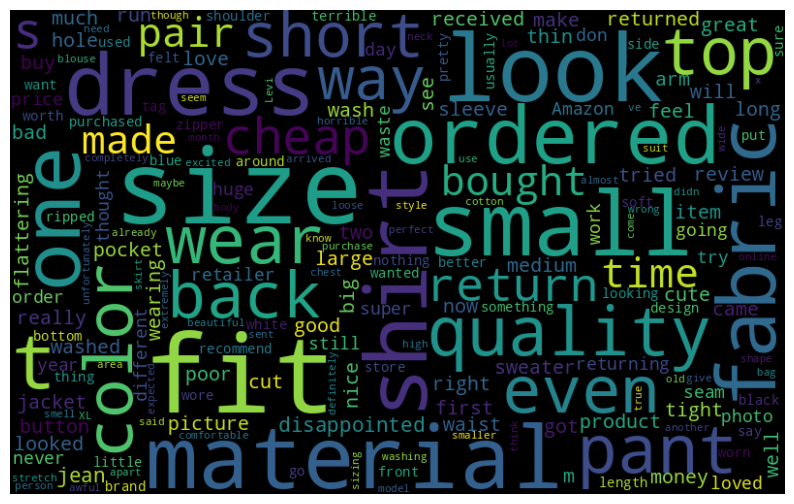

In [ ]:
palavras_nuvens(dados, 'Review', 1)

In [30]:
import nltk
import unicodedata
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocess_text(text):

    text = ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c))

    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
dados['Review'] = dados['Review'].apply(preprocess_text)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


vetorizar = TfidfVectorizer(lowercase=False, max_features=50)
palavras = vetorizar.fit_transform(dados["Review"])
matriz = pd.DataFrame.sparse.from_spmatrix(palavras, columns=vetorizar.get_feature_names_out())

modelo = LogisticRegression()

dados['Cons_rating'] = pd.to_numeric(dados['Cons_rating'], errors='coerce')
dados['Cons_rating'] = dados['Cons_rating'].fillna(-1)

x_treino, x_teste, y_treino, y_teste = train_test_split(matriz, dados["Cons_rating"], test_size=0.25, random_state=43)

modelo.fit(x_treino, y_treino)
pred = modelo.predict(x_teste)
print(f"{(accuracy_score(y_teste, pred)*100):.2f}%")

59.04%


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        50
         1.0       0.41      0.24      0.30       978
         2.0       0.15      0.01      0.02       832
         3.0       0.35      0.10      0.16      1358
         4.0       0.36      0.07      0.12      2038
         5.0       0.62      0.96      0.75      7079

    accuracy                           0.59     12335
   macro avg       0.31      0.23      0.22     12335
weighted avg       0.49      0.59      0.49     12335



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


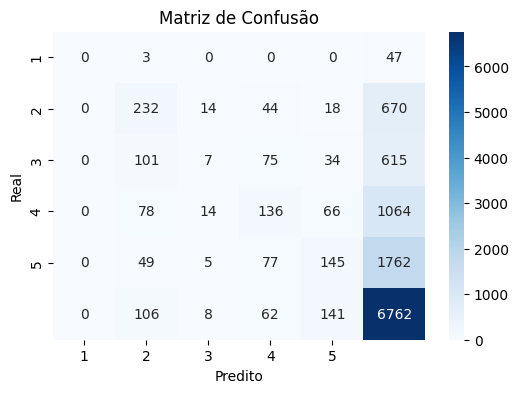

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [54]:
dados['sentimento'] = dados['Cons_rating'].apply(lambda x: 'Positivo' if x > 3 else 'Negativo')

In [52]:
dados.value_counts('sentimento')

,count
sentimento,
Positivo,36626
Negativo,12712


In [93]:
import nltk
import unidecode
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

nltk.download('rslp')
nltk.download('stopwords')

palavras_irrelevantes = nltk.corpus.stopwords.words('english')
token_pontuacao = nltk.tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()


def processar_avaliacao(avaliacao):
    tokens = token_pontuacao.tokenize(avaliacao)
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]
    frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]
    return ' '.join(frase_processada)

dados["Review"] = dados["Review"].apply(processar_avaliacao)

vetorizar = TfidfVectorizer(lowercase=False, max_features=500)
palavras = vetorizar.fit_transform(dados["Review"])
matriz = pd.DataFrame.sparse.from_spmatrix(palavras, columns=vetorizar.get_feature_names_out())

modelo = LogisticRegression()
x_treino, x_teste, y_treino, y_teste = train_test_split(matriz, dados["sentimento"], test_size=0.25, random_state=43)

modelo.fit(x_treino, y_treino)
pred = modelo.predict(x_teste)
print(f"Acurácia: {(accuracy_score(y_teste, pred) * 100):.2f}%")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Acurácia: 83.92%


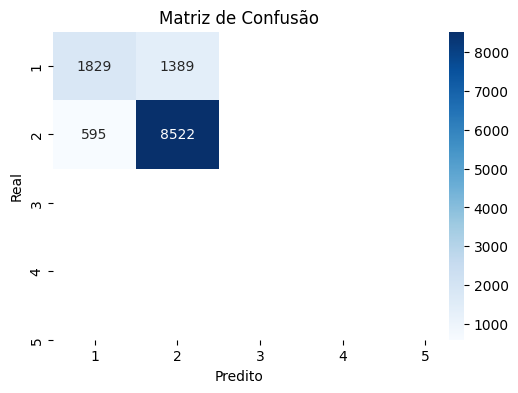

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [69]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.9 MB/s eta 0:00:00


In [96]:
avaliacao_teste = ["this product is so bad, small and not comfortable", "very comfortable!", "good",
                   "Worst thing I've ever worn, very short, poor quality fabric"]

novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in avaliacao_teste]

novas_avaliacoes_tfidf = vetorizar.transform(novas_avaliacoes_processadas)

predicoes = modelo.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': avaliacao_teste,
    'Sentimento previsto': predicoes
})

print(df_previsoes)

                                           Avaliação Sentimento previsto
0  this product is so bad, small and not comfortable            Negativo
1                                  very comfortable!            Positivo
2                                               good            Positivo
3  Worst thing I've ever worn, very short, poor q...            Negativo


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [98]:
from joblib import dump, load
import joblib

joblib.dump(vetorizar, 'tfidf_vectorizer.pkl')
joblib.dump(modelo, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [99]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

In [100]:
avaliacao_teste = ["this product is so bad, small and not comfortable", "very comfortable!", "good",
                   "Worst thing I've ever worn, very short, poor quality fabric"]

novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in avaliacao_teste]

novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': avaliacao_teste,
    'Sentimento previsto': predicoes
})

print(df_previsoes)


                                           Avaliação Sentimento previsto
0  this product is so bad, small and not comfortable            Negativo
1                                  very comfortable!            Positivo
2                                               good            Positivo
3  Worst thing I've ever worn, very short, poor q...            Negativo


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
